In [72]:
import pandas as pd
import random
train = pd.read_csv('data/train_001.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125205 entries, 0 to 125204
Data columns (total 6 columns):
id             125205 non-null int64
date           125205 non-null object
store_nbr      125205 non-null int64
item_nbr       125205 non-null int64
unit_sales     125205 non-null float64
onpromotion    103592 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 5.7+ MB


In [73]:
train.head()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
0,1269,2013-01-02,1,833396,1.0,NaN
1,2347,2013-01-02,2,838832,2.0,NaN
2,2956,2013-01-02,3,315322,35.0,NaN
3,3093,2013-01-02,3,421066,2.0,NaN
4,4297,2013-01-02,4,464385,4.0,NaN


In [74]:
train.onpromotion.dtype

dtype('O')

In [ ]:
tmp = train.onpromotion.fi

In [21]:
train['date'] = pd.to_datetime(train['date'])

In [22]:
####Feature engineering
train['weekday'] = train['date'].dt.weekday
train['month']   = train['date'].dt.month
train['year']    = train['date'].dt.year

In [23]:
holiday = pd.read_csv('data/holidays_events.csv')
holiday.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [24]:
holiday['date'] = pd.to_datetime(holiday['date'])

In [30]:
print(len(train.date.unique()))
print(len(holiday.date.unique()))
print(len(train_new.date.unique()))

1682
312
1682


In [25]:
len(train)

125205

In [34]:
train_new = pd.merge(train, holiday,how='left',on='date')
print(len(train_new))
train_new.tail()

127621


,id,date,store_nbr,item_nbr,unit_sales,onpromotion,weekday,month,year,type,locale,locale_name,description,transferred
127616,125490304,2017-08-15,51,1114566,14.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False
127617,125490800,2017-08-15,51,1463862,143.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False
127618,125492750,2017-08-15,52,1239862,2.459,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False
127619,125493311,2017-08-15,52,1658994,3.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False
127620,125493705,2017-08-15,52,2011910,6.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [38]:
store = pd.read_csv('data/stores.csv')
train_new = train_new.merge(store,on='store_nbr', how='left')
print(len(train_new))

127621


In [40]:
item = pd.read_csv('data/items.csv')
train_new = train_new.merge(item, on='item_nbr', how='left')
print(len(train_new))

127621


In [43]:
pd.set_option('display.max_columns', None)
train_new.tail()

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,weekday,month,year,type_x,locale,locale_name,description,transferred,city,state,type_y,cluster,family,class,perishable
127616,125490304,2017-08-15,51,1114566,14.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Guayaquil,Guayas,A,17,BEVERAGES,1124,0
127617,125490800,2017-08-15,51,1463862,143.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Guayaquil,Guayas,A,17,BEVERAGES,1148,0
127618,125492750,2017-08-15,52,1239862,2.459,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Manta,Manabi,A,11,POULTRY,2420,1
127619,125493311,2017-08-15,52,1658994,3.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Manta,Manabi,A,11,PRODUCE,2014,1
127620,125493705,2017-08-15,52,2011910,6.000,False,1,8,2017,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Manta,Manabi,A,11,GROCERY I,1074,0


In [50]:
import numpy as np
train_new.fillna(value=np.nan, inplace=True)

In [75]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127621 entries, 0 to 127620
Data columns (total 22 columns):
id                     127621 non-null int64
date                   127621 non-null datetime64[ns]
store_nbr              127621 non-null int64
item_nbr               127621 non-null int64
unit_sales             127621 non-null float64
onpromotion            105793 non-null object
weekday                127621 non-null int64
month                  127621 non-null int64
year                   127621 non-null int64
type_x                 21759 non-null object
locale                 21759 non-null object
locale_name            21759 non-null object
description            21759 non-null object
transferred            21759 non-null object
city                   127621 non-null object
state                  127621 non-null object
type_y                 127621 non-null object
cluster                127621 non-null int64
family                 127621 non-null object
class             

In [78]:
print(len(train_new.columns))

22


In [85]:
x_train = train_new.dropna(axis=1)
print(len(x_train.columns))
x_train.drop(['date','id','onpromotion_lbl_enc'], inplace=True, axis=1)
print(len(x_train.columns))
x_train.info()

16
13
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127621 entries, 0 to 127620
Data columns (total 13 columns):
store_nbr     127621 non-null int64
item_nbr      127621 non-null int64
unit_sales    127621 non-null float64
weekday       127621 non-null int64
month         127621 non-null int64
year          127621 non-null int64
city          127621 non-null object
state         127621 non-null object
type_y        127621 non-null object
cluster       127621 non-null int64
family        127621 non-null object
class         127621 non-null int64
perishable    127621 non-null int64
dtypes: float64(1), int64(8), object(4)
memory usage: 18.6+ MB


/Users/wz12/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
tmp = x_train.select_dtypes(include=['object'])
for name in tmp.columns:
    x_train[name+'_lbl'] = lbl.fit_transform(x_train[name].values)
    print(name, len(x_train[name+'_lbl'].unique()))
    x_train.drop(name, axis=1, inplace=True)
x_train.info()

/Users/wz12/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wz12/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


city 22
state 16
type_y 5
family 33
<class 'pandas.core.frame.DataFrame'>
Int64Index: 127621 entries, 0 to 127620
Data columns (total 13 columns):
store_nbr     127621 non-null int64
item_nbr      127621 non-null int64
unit_sales    127621 non-null float64
weekday       127621 non-null int64
month         127621 non-null int64
year          127621 non-null int64
cluster       127621 non-null int64
class         127621 non-null int64
perishable    127621 non-null int64
city_lbl      127621 non-null int64
state_lbl     127621 non-null int64
type_y_lbl    127621 non-null int64
family_lbl    127621 non-null int64
dtypes: float64(1), int64(12)
memory usage: 18.6 MB


In [56]:
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
train_new['onpromotion'+'_lbl_enc'] = lbl.fit_transform(train_new.onpromotion.values)

In [92]:
y=x_train['unit_sales']
x_train.drop(['unit_sales'],axis=1,inplace=True)
print(x_train.shape, y.shape)

(127621, 12) (127621,)


/Users/wz12/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [98]:
%%time
#######################
####Run for production
#######################
from sklearn.model_selection import train_test_split
import xgboost as xgb

denom = 0
fold = 1 #Change to 5, 1 for Kaggle Limits
for i in range(fold):
    params = {
        'eta': 0.05,
        'max_depth': 6,
        'min_child_weight':20, #3,
        'eval_metric': 'rmse', 'objective': 'reg:linear',
        #'objective': 'multi:softprob', #multinomial logistics regression
        #'eval_metric': 'mlogloss',
        #'num_class': 9,
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = train_test_split(x_train, y, test_size=0.2, random_state=i)    
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]    
    model = xgb.train(params, xgb.DMatrix(x1, y1), 1000,  watchlist, verbose_eval=100, early_stopping_rounds=100)

[0]	train-rmse:21.4352	valid-rmse:22.3131
Multiple eval metrics have been passed: 'valid-rmse' will be used for early stopping.

Will train until valid-rmse hasn't improved in 100 rounds.
[100]	train-rmse:17.8678	valid-rmse:19.8404
[200]	train-rmse:17.096	valid-rmse:19.5359
[300]	train-rmse:16.5866	valid-rmse:19.3437
[400]	train-rmse:16.2212	valid-rmse:19.223
[500]	train-rmse:15.8962	valid-rmse:19.1085
[600]	train-rmse:15.6956	valid-rmse:19.0433
[700]	train-rmse:15.5498	valid-rmse:18.9759
[800]	train-rmse:15.3168	valid-rmse:18.8793
[900]	train-rmse:15.0488	valid-rmse:18.769
CPU times: user 1min 11s, sys: 102 ms, total: 1min 11s
Wall time: 1min 11s


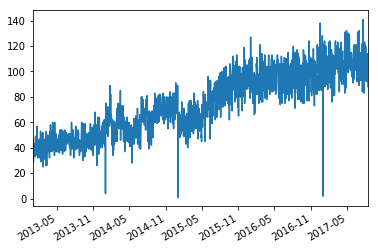

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
train.date.value_counts().plot()

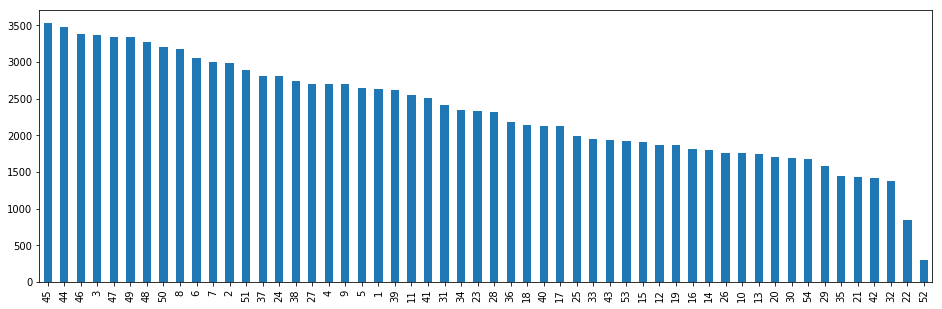

In [28]:
train.store_nbr.value_counts().plot.bar(figsize=(16,5))

In [29]:
items = pd.read_csv('data/items.csv')
items.head()

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [50]:
print(len(items.family.unique()))

33


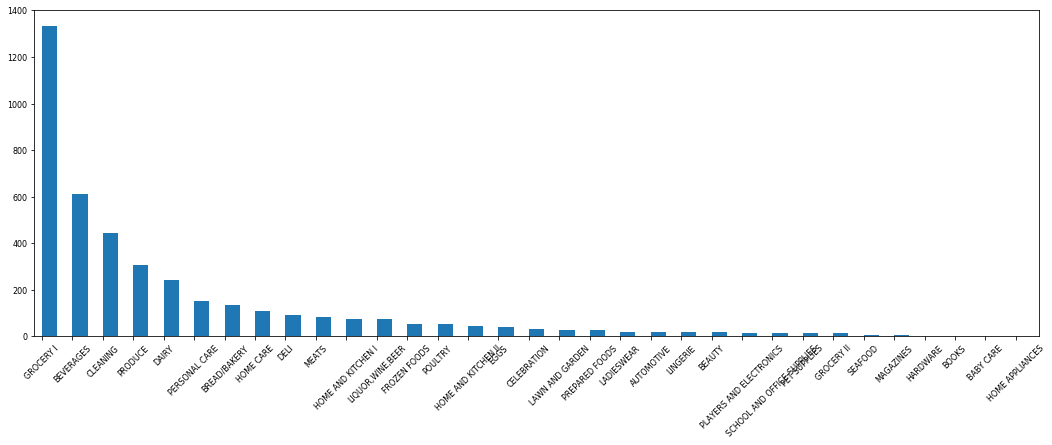

In [39]:
items.family.value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=8)

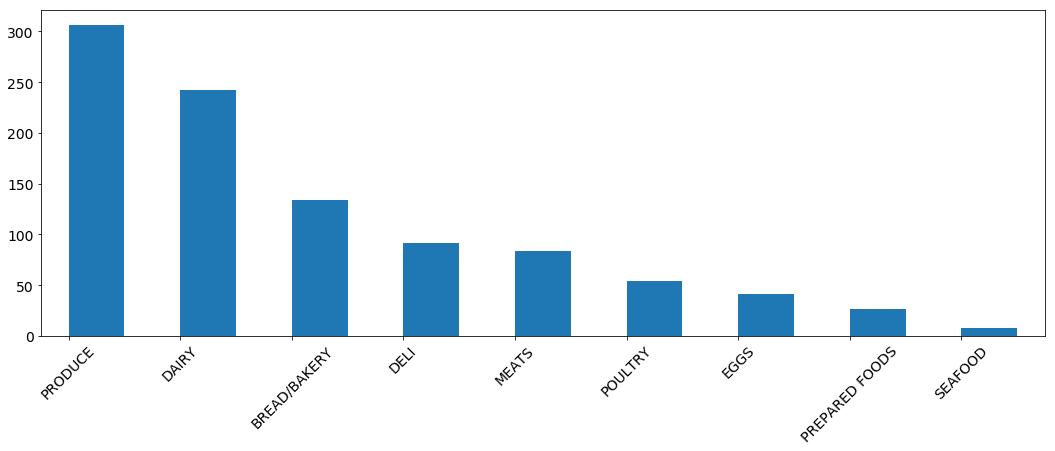

In [42]:
items.loc[items.perishable==1, 'family'].value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=14)

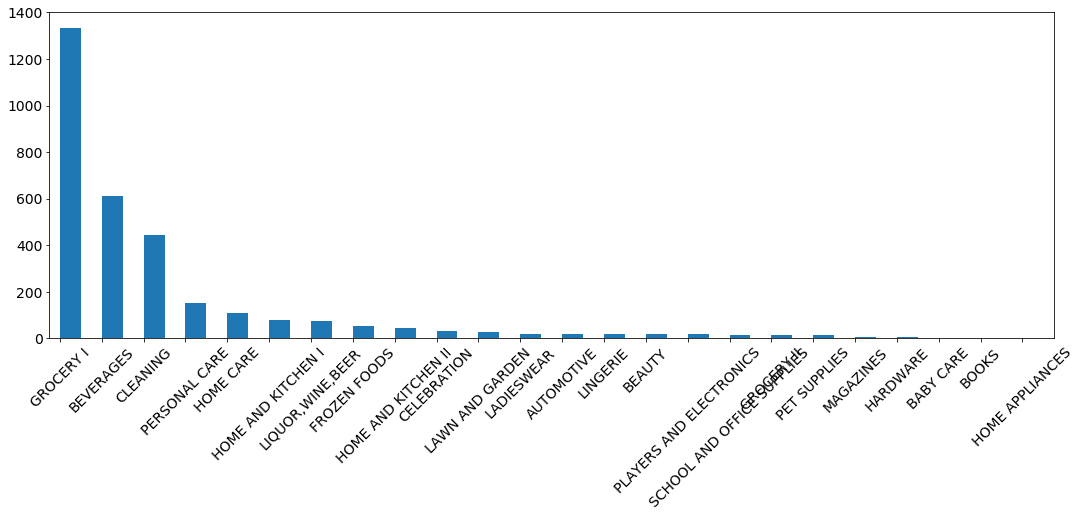

In [43]:
items.loc[items.perishable==0, 'family'].value_counts().plot.bar(figsize=(18,6), rot=45,position=0,fontsize=14)

In [51]:
len(train.date.unique())

1682

In [7]:
#train.set_index('id', inplace=True)
train.memory_usage(index=True)

Index          1003976320
date           1003976320
store_nbr      1003976320
item_nbr       1003976320
unit_sales     1003976320
onpromotion    1003976320
dtype: int64

In [19]:
import numpy as np
int_types = ["uint8", "int8", "int16", "int64"]
for it in int_types:
    print(np.iinfo(it))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------



In [9]:
train.store_nbr  = pd.to_numeric(train.store_nbr, downcast='unsigned')
train.unit_sales = pd.to_numeric(train.item_nbr, downcast='float')
#use map to convert columns
#d = {'Delivered': True, 'Undelivered': False}
#df['Status'].map(d)
#train.item_nbr   = pd.to_numeric(train.item_nbr, downcast='int32') #no int32 downcast

In [21]:
train.date  = pd.to_datetime(train.date)
#train.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125497040 entries, 0 to 125497039
Data columns (total 5 columns):
date           125497040 non-null datetime64[ns]
store_nbr      125497040 non-null uint8
item_nbr       125497040 non-null int64
unit_sales     125497040 non-null float32
onpromotion    103839389 non-null object
dtypes: datetime64[ns](1), float32(1), int64(1), object(1), uint8(1)
memory usage: 9.3+ GB
